#  Linear Regression

In [11]:
import pandas as pd
df = pd.read_csv('../datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.count(0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [12]:
# Applying axis as 1 to remove the columns with the following labels
df = df.drop(['Ticket','Cabin','Name'], axis=1)
df = df.dropna()

In [17]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [22]:
import numpy as np
from patsy import dmatrices, dmatrix, demo_data

formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)+ Parch'

- The variable that is defined left of '~' is the dependent variable, and the variable that is defined to right of it are the independent variables. 
- The variables enclosed within C() are treated as categorical variables.

In [35]:
# create a results dictionary to hold our regression results for easy
# analysis later
df_train = df.iloc[ 0: 600, : ]
df_test = df.iloc[ 600: , : ]

#Splitting the data into dependent and independent variables
y_train,x_train = dmatrices(formula, data=df_train,return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test,return_type='dataframe')

x_train.head()

,Intercept,C(Pclass)[T.2],C(Pclass)[T.3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Age,SibSp,Parch
0,1.0,0.0,1.0,1.0,0.0,1.0,22.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,38.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,35.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0,1.0,35.0,0.0,0.0


## Building a model

In [30]:
# instantiate our model
import statsmodels.api as sm

model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.450031
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:                  0.3333
Time:                        14:57:48   Log-Likelihood:                -270.02
converged:                       True   LL-Null:                       -404.99
                                        LLR p-value:                 1.009e-53
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3332      0.510      8.490      0.000       3.333       5.334
C(Pclass)[T.2]      -1.2030      0.325     -3.703      0.000      -1.840      -0.566
C(Pclass)[T.3]      -2.4673      0.320     -7.705      0.000      -3.095      -1.840
C(Sex)[T.male]      -2.6312      0.244    -10.797      0.000      -3.109      -2.154
C(Embarked)[T.Q]    -0.4359      0.647     -0.674      0.501      -1.704       0.832
C(Embarked)[T.S]    -0.2910      0.297     -0.980      0.327      -0.873       0.291
Age                 -0.0397      0.009     -4.464      0.000      -0.057      -0.022
SibSp               -0.3202      0.136     -2.354      0.019      -0.587      -0.054
Parch               -0.1420      0.136     -1.041      0.298      -0.409       0.125
====================================================================================
"""

- We can see that the Maximum Likelihood Estimation has been used to predict the coefficients. 
- The pseudo r square is similar to the r square of linear regression, which is used to measure the goodness of it. 
- A pseudo r square value between 0.2 and 0.4 is considered good that we have got a value of 0.33.

In [36]:
#Previous:'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + C(Embarked)+ Parch'
formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp '
y_train,x_train = dmatrices(formula, data=df_train, return_type='dataframe')
y_test,x_test = dmatrices(formula, data=df_test, return_type='dataframe')

# instantiate our model
model = sm.Logit(y_train,x_train)
res = model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Sun, 30 Jun 2019   Pseudo R-squ.:                  0.3307
Time:                        15:02:48   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
                                        LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000       3.167       5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000      -1.896      -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000      -3.172      -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000      -3.041      -2.121
Age               -0.0401      0.009     -4.549      0.000      -0.057      -0.023
SibSp             -0.3691      0.130     -2.840      0.005      -0.624      -0.114
==================================================================================
"""

## Model evaluation

Text(0.5,1,'Distribution of our Predictions')

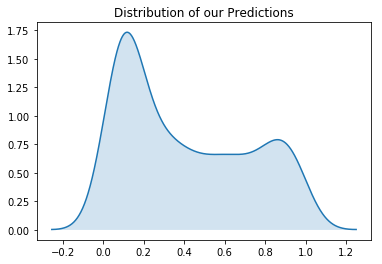

In [44]:
import statsmodels as sm
import matplotlib.pyplot as plt

kde_res =  sm.nonparametric.kde.KDEUnivariate(res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")

### Let's see the prediction distribution based on the male gender

Text(0.5,1,'The Change of Survival Probability by Gender being Male')

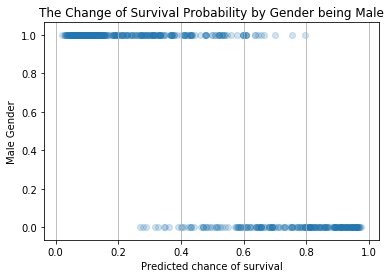

In [45]:
plt.scatter(res.predict(),x_train['C(Sex)[T.male]'] , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

### The distribution of the prediction based on the lower class of the passengers:

Text(0.5,1,'The Change of Survival Probability by Lower Class which is 3rd class')

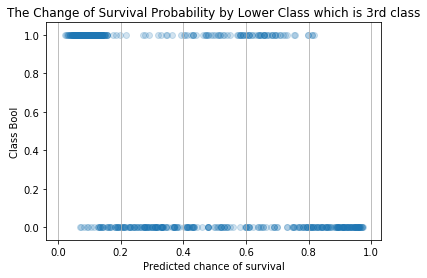

In [46]:
plt.scatter(res.predict(),x_train['C(Pclass)[T.3]'] , alpha=0.2)
plt.xlabel("Predicted chance of survival")
plt.ylabel("Class Bool") # Boolean class to show if its 3rd class
plt.grid(b=True, which='major', axis='x')
plt.title("The Change of Survival Probability by Lower Class which is 3rd class")

### Let's see the distribution of the probability with respect to the age of the passengers:

Text(0,0.5,'Age')

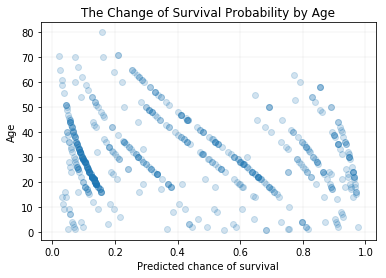

In [47]:
plt.scatter(res.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("Age")

### Let's see the distribution of the probability with respect to the number of siblings/spouses:

Text(0,0.5,'No. of Siblings/Spouses')

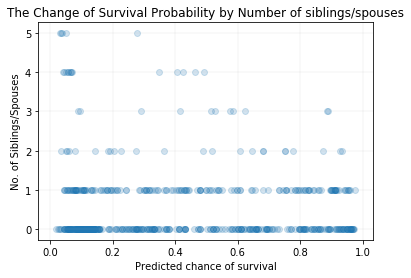

In [49]:
plt.scatter(res.predict(),x_train.SibSp , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Number of siblings/spouses")
plt.xlabel("Predicted chance of survival")
plt.ylabel("No. of Siblings/Spouses")

- The only pattern we can see is that passengers with four to five siblings/spouses had a lower probability of survival

## Evaluating a model based on test data

In [52]:
y_pred = res.predict(x_test)
y_pred_flag = y_pred > 0.7
res=pd.crosstab(y_test.Survived,y_pred_flag ,rownames = ['Actual'], colnames = ['Predicted'])
print( res)

Predicted  False  True 
Actual                 
0.0           67      0
1.0           21     24


In [51]:
print (classification_report(y_test,y_pred_flag))

             precision    recall  f1-score   support

        0.0       0.76      1.00      0.86        67
        1.0       1.00      0.53      0.70        45

avg / total       0.86      0.81      0.80       112



In [56]:
from sklearn import metrics
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print ("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.879934


Here are some of our observations:

   -  False Positive (FP): This is a positive prediction, which is actually wrong. So, in the preceding crosstab, 0 is False Positive
   -  True Positive (TP): This is a positive prediction, which is actually right. So, in the preceding crosstab, 24 is True Positive
   -  True Negative (TN): This is a negative prediction, which is actually right. So, in the above crosstab, 67 is True Negative
   -  False Negative (FN): This is a negative prediction, which is actually wrong. So, in the preceding cross tab, 21 is False Negative

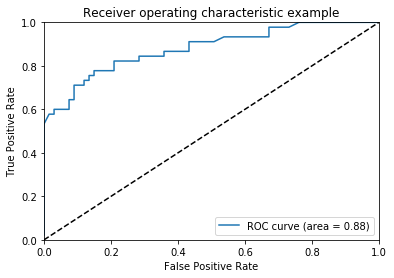

In [57]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Model building and evaluation with SciKit

In [61]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x_train, y_train.Survived)

In [116]:
# examine the coefficients
pd_list=list(zip(x_train.columns.tolist(), model.coef_.tolist()[0]))
pd.DataFrame(pd_list)



,0,1
0,Intercept,1.679011
1,C(Pclass)[T.2],-0.941154
2,C(Pclass)[T.3],-2.139352
3,C(Sex)[T.male],-2.343785
4,Age,-0.031432
5,SibSp,-0.297689


In [103]:
x_train.columns.tolist()

['Intercept',
 'C(Pclass)[T.2]',
 'C(Pclass)[T.3]',
 'C(Sex)[T.male]',
 'Age',
 'SibSp']

In [117]:
model.coef_.tolist()[0]

[1.6790105553177588,
 -0.9411538561740157,
 -2.1393520604676266,
 -2.3437849583554966,
 -0.03143233706519054,
 -0.2976887553581146]

In [119]:
y_pred = model.predict_proba(x_test)
y_pred_flag = y_pred[:,1] > 0.7
print (pd.crosstab(y_test.Survived,y_pred_flag,rownames = ['Actual'],colnames = ['Predicted']))

Predicted  False  True 
Actual                 
0.0           67      0
1.0           23     22


In [120]:
print (classification_report(y_test,y_pred_flag))

             precision    recall  f1-score   support

        0.0       0.74      1.00      0.85        67
        1.0       1.00      0.49      0.66        45

avg / total       0.85      0.79      0.77       112



Area under the ROC curve : 0.878275


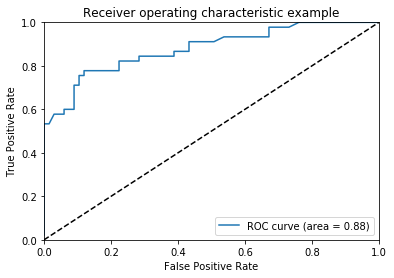

In [123]:
# Compute ROC curve and area the curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)

print ("Area under the ROC curve : %f" % roc_auc)

# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()